# Explore data
we use [bag of words](https://en.wikipedia.org/wiki/Bag-of-words_model) as feature of comments. Firstly, we have to preprocess all text data. Steps to preprocess data:
1. Convert upper letters to lower letters.
2. Remove punctuations.
3. Split all sentences into seperated words.
4. Remove [stop words](https://en.wikipedia.org/wiki/Stop_word]).
5. Remove words and digits containing digits.
6. Stemming and Lemmatization.
7. With a new comment, we remove words that model does not know.

First, read data, and explore it.

In [18]:
import numpy as np
import pandas as pd
from nltk.stem import PorterStemmer 
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
import itertools

In [33]:
# Read data
data = pd.read_excel('data.xlsx')

data.head()

,Title,Content,Rate
0,Good light hearted fun.,This is nowhere near as bad as some of the rev...,7.0
1,Wartime Themes,Love and sacrifice during WWII underlie the st...,NaN
2,"""Critics"" gave Gravity a 9, and flunked Area 51.","As a big sci-fi fan and UFO-enthusiast, I real...",9.0
3,A slow start builds to a riveting climax,At the beginning of this film I thought we wer...,NaN
4,"If God is a movie, he's this one.",My moron friend John says that this movie is t...,9.0


Number of columns and number of rows

In [26]:
(num_rows, num_cols) = data.shape
print('Number of rows: {0}'.format(num_rows))
print('Number of cols: {0}'.format(num_cols))

Number of rows: 2451
Number of cols: 3


Datatype of each column

In [27]:
data.dtypes

Title       object
Content     object
Rate       float64
dtype: object

# Preprocess data

How many NaN values

In [29]:
data.isna().sum()

Title        0
Content    211
Rate       263
dtype: int64

Because we have 2451 rows and the number of missing values ($211+263=474$) is small, so that we decide to remove rows having missing values

In [30]:
data.dropna(inplace=True)

Update the number of columns and the number of rows

In [31]:
(num_rows, num_cols) = data.shape
print('Number of rows: {0}'.format(num_rows))
print('Number of cols: {0}'.format(num_cols))

Number of rows: 2003
Number of cols: 3


## Discorver numerical column
With numerical column , we calculate:
* Percent missing values
* Minimum value
* Maximum value
* Lower quartile value
* Median value
* Upper quartile value
* Maximum value

We save the value in `nume_col_info_df`

In [38]:
nume_col_info_df = pd.DataFrame(index = ["missing_percentage", "min", "lower_quartile", "median", "upper_quartile", "max"], columns=['Rate'])
nume_col_info_df.loc['missing_percentage'] = data['Rate'].isnull().sum(axis = 0)/ num_rows * 100
nume_col_info_df.loc['min'] = data['Rate'].min(axis = 0)
nume_col_info_df.loc['max'] = data['Rate'].max(axis = 0)
nume_col_info_df.loc['lower_quartile'] = data['Rate'].quantile(q=0.25)
nume_col_info_df.loc['median'] = data['Rate'].quantile(q=0.5)
nume_col_info_df.loc['upper_quartile'] = data['Rate'].quantile(q=0.75)
# raise NotImplementedError()
nume_col_info_df

,Rate
missing_percentage,13.1303
min,1
lower_quartile,2
median,8
upper_quartile,10
max,10


Plot data 'Rate' column

<AxesSubplot:>

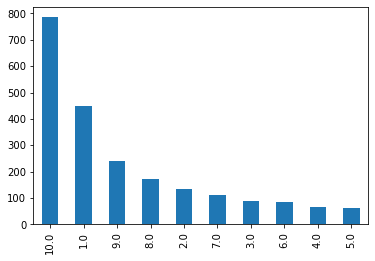

In [46]:
data['Rate'].value_counts().plot.bar()

In [39]:
data['Rate'].unique()

array([ 7., nan,  9.,  3.,  1.,  2., 10.,  8.,  5.,  6.,  4.])

In [ ]:
# Stop words
stop_words = set(stopwords.words('english'))

# Set of words will be learned
vocal_dict = dict()
vocal_size = 0

def preprocess(text, train):
    # Convert upper letters to lower letters
    text = text.lower()
    
    # Remove punctuations
    text = re.sub(r'[^\w\s]', '', text)
    
    # Remove words and digits containing digits
    text = re.sub('W*dw*','',text)
    
    # Split all sentences into seperated words
    word_tokens = word_tokenize(text)
    
    # Remove stop words
    words = [w for w in word_tokens if not w in stop_words]
    
    for i in range(len(words)):
        # Stemming and Lemmatization
        words[i] = PorterStemmer().stem(words[i])

        if train and words[i] not in vocal_dict:
            vocal_dict[words[i]] = vocal_size
            vocal_size += 1
        if not train and words[i] not in vocal_dict:
            words[i] = 'unk'
    return words

In [ ]:
# Read data
data = pd.read_excel('data.xls')

# Random data
data.sample(frac=1)



In [16]:
print(re.sub(r'[^\w\s]', '', 'I go to school'))

I go to school
